<a href="https://colab.research.google.com/github/Tejasvast44/CodSoft/blob/main/MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

In [5]:
df = pd.read_csv('/content/IMDb Movies India.csv', encoding='latin-1')

In [6]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.shape

(15509, 10)

In [9]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [11]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [14]:
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(inplace=True)

In [21]:
df['Year'].unique()

array([nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)',
       '(2012)', '(2014)', '(2004)', '(2016)', '(1991)', '(1990)',
       '(2018)', '(1987)', '(1948)', '(1958)', '(2017)', '(2020)',
       '(2009)', '(2002)', '(1993)', '(1946)', '(1994)', '(2007)',
       '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)',
       '(1974)', '(2015)', '(2006)', '(1981)', '(1985)', '(2011)',
       '(2001)', '(1967)', '(1988)', '(1995)', '(1959)', '(1996)',
       '(1970)', '(1976)', '(2000)', '(1999)', '(1973)', '(1968)',
       '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)',
       '(1977)', '(1957)', '(1950)', '(1992)', '(1969)', '(1975)',
       '(1947)', '(1972)', '(1971)', '(1935)', '(1978)', '(1960)',
       '(1944)', '(1963)', '(1940)', '(1984)', '(1934)', '(1955)',
       '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)',
       '(1952)', '(1933)', '(1942)', '(1939)', '(1954)', '(1945)',
       '(1961)', '(1965)', '(1938)', '(1941)', '(1931)', 

In [23]:
df['Duration'].unique()

array([nan, '109 min', '90 min', '110 min', '105 min', '147 min',
       '142 min', '59 min', '82 min', '116 min', '96 min', '120 min',
       '161 min', '166 min', '102 min', '87 min', '132 min', '66 min',
       '146 min', '112 min', '168 min', '158 min', '126 min', '94 min',
       '138 min', '124 min', '144 min', '157 min', '136 min', '107 min',
       '113 min', '80 min', '122 min', '149 min', '148 min', '130 min',
       '121 min', '188 min', '115 min', '103 min', '114 min', '170 min',
       '100 min', '99 min', '140 min', '128 min', '93 min', '125 min',
       '145 min', '75 min', '111 min', '134 min', '85 min', '104 min',
       '92 min', '137 min', '127 min', '150 min', '119 min', '135 min',
       '86 min', '76 min', '70 min', '72 min', '151 min', '95 min',
       '52 min', '89 min', '143 min', '177 min', '117 min', '123 min',
       '154 min', '88 min', '175 min', '153 min', '78 min', '139 min',
       '133 min', '101 min', '180 min', '60 min', '46 min', '164 min',
       '

In [24]:
df["Duration"]=df["Duration"].str.replace(" min","").astype(float)
df["Duration"].head()

,Duration
0,NaN
1,109.0
2,90.0
3,110.0
4,105.0


In [26]:
df['Year']=df['Year'].str.strip('()').astype(float)
df['Year'].head()

,Year
0,NaN
1,2019.0
2,2021.0
3,2019.0
4,2010.0


In [27]:
df["Votes"]=df["Votes"].str.replace(",","")
df["Votes"]=df["Votes"].str.replace("$5.16M","516",regex=False).astype(float)
df["Votes"].head()

,Votes
0,NaN
1,8.0
2,NaN
3,35.0
4,NaN


In [29]:
df["Votes"].fillna(df["Votes"].median(),inplace=True)

In [30]:
df["Duration"].fillna(df["Duration"].median(),inplace=True)

In [31]:
df["Rating"].fillna(df["Rating"].median(),inplace=True)

In [32]:
df.dropna(subset=["Genre","Actor 1","Year","Director","Actor 2","Actor 3"],inplace=True)

In [33]:
df.isnull().sum()

,0
Name,0
Year,0
Duration,0
Genre,0
Rating,0
Votes,0
Director,0
Actor 1,0
Actor 2,0
Actor 3,0


In [34]:
df.nunique()

,0
Name,10178
Year,94
Duration,178
Genre,448
Rating,84
Votes,2032
Director,4530
Actor 1,3764
Actor 2,4175
Actor 3,4398


In [35]:
df["Rating"].value_counts()

,count
Rating,
6.0,3738
6.2,259
6.8,251
6.5,246
6.6,223
...,...
1.4,1
9.6,1
9.7,1


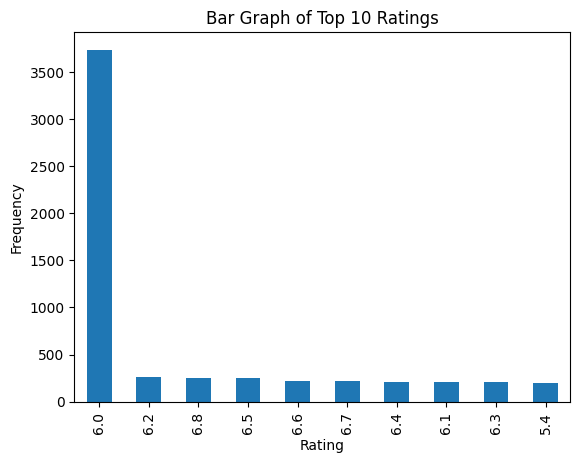

In [39]:
df["Rating"].value_counts().head(10).plot(kind='bar') # Use head(10) before plotting to select the top 10 values
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Bar Graph of Top 10 Ratings")
plt.show()

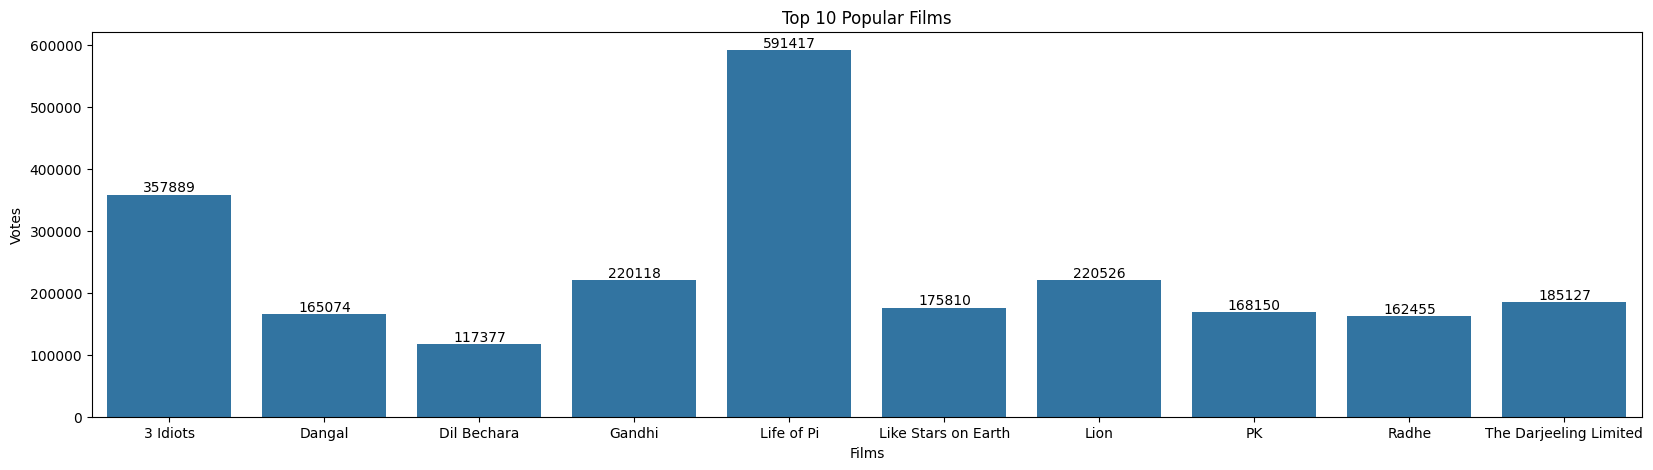

In [44]:
df.sort_values(by="Votes",ascending=False,inplace=True)
top10_popular_films=df["Name"].head(10)
plt.figure(figsize=(20,5))
bar3=sns.barplot(x=top10_popular_films,y=df["Votes"])
bar3.bar_label(bar3.containers[0])
plt.xlabel("Films")
plt.ylabel("Votes")
plt.title("Top 10 Popular Films")
plt.show()

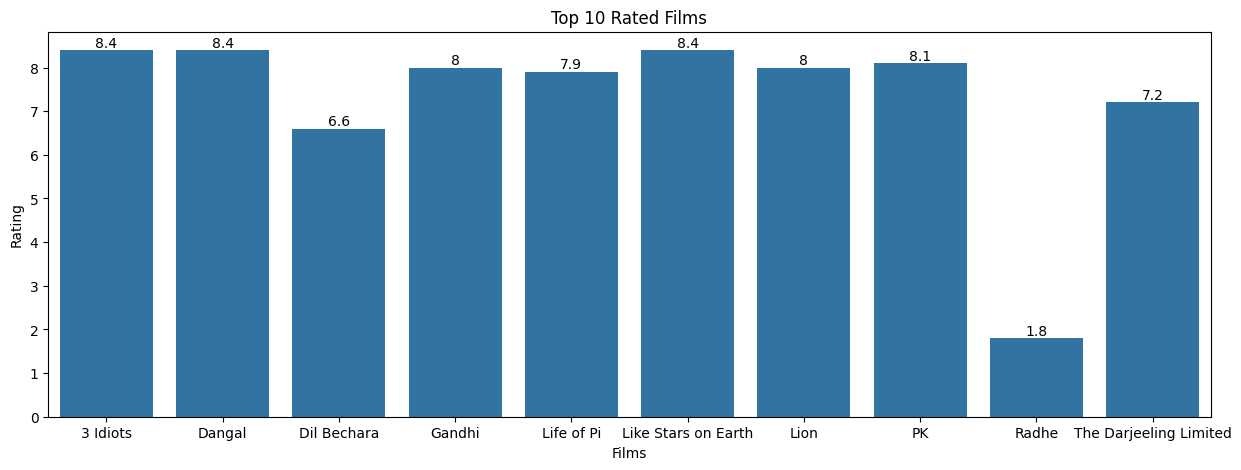

In [46]:
top10_rated_films=df["Name"].head(10)
plt.figure(figsize=(15,5))
bar2=sns.barplot(x=top10_rated_films,y=df["Rating"])
bar2.bar_label(bar2.containers[0])
plt.xlabel("Films")
plt.ylabel("Rating")
plt.title("Top 10 Rated Films")
plt.show()

In [73]:
df['Genre encoded'] = round(df.groupby('Genre')['Rating'].transform('mean'),1)
df['Votes encoded'] = round(df.groupby('Votes')['Rating'].transform('mean'),1)
df['Director encoded'] = round(df.groupby('Director')['Rating'].transform('mean'),1)
df['Actor 1 encoded'] = round(df.groupby('Actor 1')['Rating'].transform('mean'),1)
df['Actor 2 encoded'] = round(df.groupby('Actor 2')['Rating'].transform('mean'),1)
df['Actor 3 encoded'] = round(df.groupby('Actor 3')['Rating'].transform('mean'),1)

df.drop(columns=['Genre','Votes','Director','Actor 1','Actor 2','Actor 3'],inplace=True)
df['Rating'] = round(df['Rating'],1)
df.head()

,Name,Year,Duration,Rating,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
8219,Life of Pi,2012.0,127.0,7.9,6.3,7.9,7.9,7.9,5.9,7.5
75,3 Idiots,2009.0,170.0,8.4,5.9,8.4,8.1,6.8,6.3,8.4
8233,Lion,2016.0,118.0,8.0,6.6,8.0,8.0,7.8,8.0,8.0
4848,Gandhi,1982.0,191.0,8.0,6.8,8.0,8.0,8.0,8.0,6.5
14038,The Darjeeling Limited,2007.0,91.0,7.2,6.2,7.2,7.2,5.6,7.2,7.2


In [75]:
X = df.drop(columns=['Rating','Name'])
Y =df[['Rating']]

In [76]:
X.head()

,Year,Duration,Genre encoded,Votes encoded,Director encoded,Actor 1 encoded,Actor 2 encoded,Actor 3 encoded
8219,2012.0,127.0,6.3,7.9,7.9,7.9,5.9,7.5
75,2009.0,170.0,5.9,8.4,8.1,6.8,6.3,8.4
8233,2016.0,118.0,6.6,8.0,8.0,7.8,8.0,8.0
4848,1982.0,191.0,6.8,8.0,8.0,8.0,8.0,6.5
14038,2007.0,91.0,6.2,7.2,7.2,5.6,7.2,7.2


In [77]:
Y.head()

,Rating
8219,7.9
75,8.4
8233,8.0
4848,8.0
14038,7.2


In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=21)

In [79]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((8868, 8), (2217, 8), (8868, 1), (2217, 1))

In [80]:
model=LinearRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)

In [82]:
mse=mean_squared_error(pred,Y_test)
round(mse,2)

0.31

In [84]:
score=r2_score(pred,Y_test)
round(score,2)

0.69

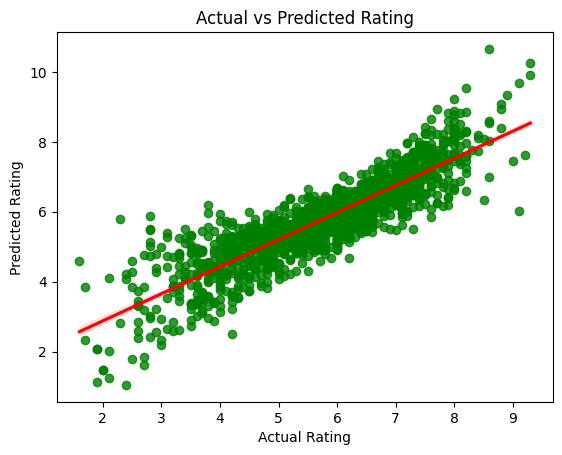

In [88]:
sns.regplot(x=Y_test,y=pred,line_kws=dict(color="r"),scatter_kws=dict(color="green"))
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Rating")
plt.show()

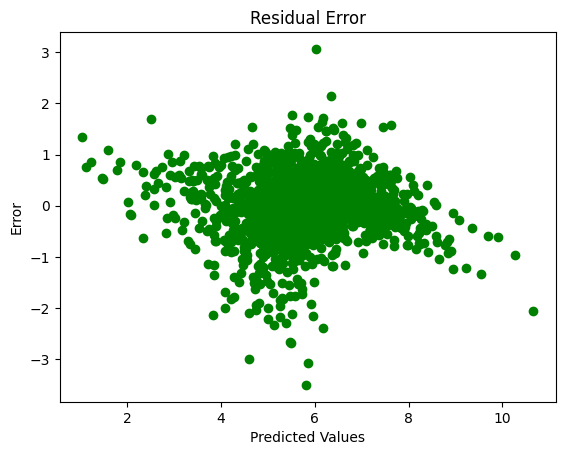

In [90]:
residual=Y_test-pred
plt.scatter(x=pred,y=residual,c="green")
plt.xlabel("Predicted Values")
plt.ylabel("Error")
plt.title("Residual Error")
plt.show()